# This notebook  focuses on collecting data, organizing it and making sure it's well defined.

***

We get our data from Zillow website. Our objective is to forecast the real estate housing prices in the United States.

# 1. Import packages

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime

In [4]:
#insert data from csv
df = pd.read_csv('/Users/amrita/Desktop/zillow data.csv')

In [5]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,...,2/28/21,3/31/21,4/30/21,5/31/21,6/30/21,7/31/21,8/31/21,9/30/21,10/31/21,11/30/21
0,102001,0,United States,Country,NaN,127104.0,127448.0,127809.0,128546.0,129288.0,...,274766.0,278419,282276,286980.0,292503,298382.0,303772.0,308393.0,312486.0,316368
1,394913,1,"New York, NY",Msa,NY,223875.0,225213.0,226416.0,228785.0,230991.0,...,520343.0,524700,529431,534932.0,542083,549998.0,557578.0,563469.0,568010.0,571556
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,231151.0,231956.0,233189.0,235533.0,238046.0,...,748563.0,756432,767475,783139.0,802944,823842.0,837285.0,846395.0,851153.0,858357
3,394463,3,"Chicago, IL",Msa,IL,169017.0,169416.0,169932.0,170965.0,172060.0,...,258870.0,260970,263993,266728.0,270524,274664.0,278755.0,281808.0,284452.0,287131
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,130276.0,130380.0,130466.0,130678.0,130900.0,...,280524.0,284541,290061,296469.0,303787,311586.0,319478.0,326661.0,332734.0,338194


# 2. Transpose data

In [6]:
#transpose data 
ndf= df.melt(id_vars=["RegionID", "SizeRank","RegionName","RegionType","StateName" ], 
        var_name="Date", 
        value_name="Price")

In [7]:
ndf.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Price
0,102001,0,United States,Country,NaN,1/31/00,127104.0
1,394913,1,"New York, NY",Msa,NY,1/31/00,223875.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,1/31/00,231151.0
3,394463,3,"Chicago, IL",Msa,IL,1/31/00,169017.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,1/31/00,130276.0


In [8]:
#summary of the datatype
ndf.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
Date           object
Price         float64
dtype: object

In [ ]:
# notes: March is computed as avg between february and april.

# 3. Analysis of missing values

In [9]:
#no. of missing values by column
ndf.isna().sum()

RegionID          0
SizeRank          0
RegionName        0
RegionType        0
StateName       263
Date              0
Price         48727
dtype: int64

In [10]:
#Checking for the total count of Region name=United States 

i= ndf[ndf['RegionName']=='United States']
i.shape

(263, 7)

In [11]:
i.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Price
0,102001,0,United States,Country,NaN,1/31/00,127104.0
908,102001,0,United States,Country,NaN,2/29/00,127448.0
1816,102001,0,United States,Country,NaN,3/31/00,127809.0
2724,102001,0,United States,Country,NaN,4/30/00,128546.0
3632,102001,0,United States,Country,NaN,5/31/00,129288.0


In [12]:
#Dropping all rows with Region Name=United States and creating a new dataframe

df_new= ndf[ndf.RegionName != 'United States']
df_new.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Price
1,394913,1,"New York, NY",Msa,NY,1/31/00,223875.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,1/31/00,231151.0
3,394463,3,"Chicago, IL",Msa,IL,1/31/00,169017.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,1/31/00,130276.0
5,394974,5,"Philadelphia, PA",Msa,PA,1/31/00,129615.0


In [13]:
df_new.describe()

,RegionID,SizeRank,Price
count,238541.000000,238541.000000,1.898140e+05
mean,415361.502756,458.604190,1.612216e+05
std,83488.890005,267.525459,1.038787e+05
min,394297.000000,1.000000,2.848100e+04
25%,394548.000000,227.000000,9.925225e+04
50%,394804.000000,455.000000,1.320360e+05
75%,395050.000000,687.000000,1.877395e+05
max,753929.000000,933.000000,1.506129e+06


***

# 4. Check time gaps

In [46]:
df_gaps.describe()

,RegionID,SizeRank,Price
count,238541.000000,238541.000000,1.898140e+05
mean,415361.502756,458.604190,1.612216e+05
std,83488.890005,267.525459,1.038787e+05
min,394297.000000,1.000000,2.848100e+04
25%,394548.000000,227.000000,9.925225e+04
50%,394804.000000,455.000000,1.320360e+05
75%,395050.000000,687.000000,1.877395e+05
max,753929.000000,933.000000,1.506129e+06


In [47]:
df_gaps.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Price
Date,,,,,,
2000-01-31,394913,1,"New York, NY",Msa,NY,223875.0
2000-01-31,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,231151.0
2000-01-31,394463,3,"Chicago, IL",Msa,IL,169017.0
2000-01-31,394514,4,"Dallas-Fort Worth, TX",Msa,TX,130276.0
2000-01-31,394974,5,"Philadelphia, PA",Msa,PA,129615.0


In [45]:
df_gaps.tail()

,RegionID,SizeRank,RegionName,RegionType,StateName,Price
Date,,,,,,
2021-11-30,394767,929,"Lamesa, TX",Msa,TX,90119.0
2021-11-30,753874,930,"Craig, CO",Msa,CO,244056.0
2021-11-30,394968,931,"Pecos, TX",Msa,TX,168297.0
2021-11-30,395188,932,"Vernon, TX",Msa,TX,75166.0
2021-11-30,394743,933,"Ketchikan, AK",Msa,AK,339435.0


In [17]:
df_gaps.RegionName.nunique()

907

In [20]:
# no time gaps present
df_gaps.RegionName.value_counts(ascending=False)

Farmington, NM                   263
Elko, NV                         263
Picayune, MS                     263
California-Lexington Park, MD    263
Lawton, OK                       263
                                ... 
Carson City, NV                  263
St. George, UT                   263
Gloversville, NY                 263
Greeley, CO                      263
Burlington, NC                   263
Name: RegionName, Length: 907, dtype: int64

# 5. Skewness(by each region)

In [38]:
#check skewness
df_gaps.groupby('RegionName').Price.skew().reset_index().sort_values(by=['Price'])

,RegionName,Price
73,"Beckley, WV",-1.077982
81,"Bennington, VT",-1.007011
311,"Gettysburg, PA",-0.952546
710,"Rutland, VT",-0.882200
854,"Virginia Beach, VA",-0.858403
...,...,...
456,"Lebanon, PA",2.060868
540,"Missoula, MT",2.131235
389,"Jackson, TN",2.138321
198,"Cullowhee, NC",2.207258


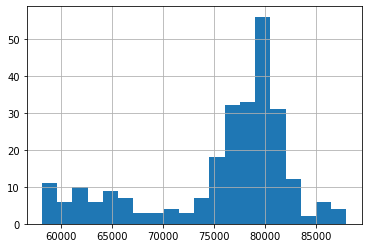

In [30]:
df_gaps[df_gaps.RegionName=='Beckley, WV'].Price.hist(bins=20)


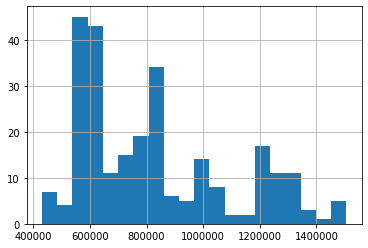

In [37]:
df_gaps[df_gaps.RegionName=='San Jose, CA'].Price.hist(bins=20)


In [39]:
#no. of missing values by column in the new dataset

df_gaps.isna().sum()

RegionID          0
SizeRank          0
RegionName        0
RegionType        0
StateName         0
Price         48727
dtype: int64

In [40]:
#percent missing values by each column

percent_missing = df_gaps.isnull().sum() * 100 / len(df_gaps)
missing_value_df = pd.DataFrame({'column_name': df_gaps.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)

           column_name  percent_missing
RegionID      RegionID         0.000000
SizeRank      SizeRank         0.000000
RegionName  RegionName         0.000000
RegionType  RegionType         0.000000
StateName    StateName         0.000000
Price            Price        20.427096


# 6. Imputation

In [41]:
#impute missing values using interpolation method

interpolated = df_gaps.interpolate(method='linear')
interpolated.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Price
Date,,,,,,
2000-01-31,394913,1,"New York, NY",Msa,NY,223875.0
2000-01-31,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,231151.0
2000-01-31,394463,3,"Chicago, IL",Msa,IL,169017.0
2000-01-31,394514,4,"Dallas-Fort Worth, TX",Msa,TX,130276.0
2000-01-31,394974,5,"Philadelphia, PA",Msa,PA,129615.0


In [42]:
#no missing values 

interpolated.isna().sum()

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
Price         0
dtype: int64

In [43]:
#percent missing values by each column

percentage_missing = interpolated.isnull().sum() * 100 / len(interpolated)
missing_value = pd.DataFrame({'column_name': interpolated.columns,
                                 'percent_missing': percentage_missing})
missing_value.sort_values('percent_missing', inplace=True)
print(missing_value)

           column_name  percent_missing
RegionID      RegionID              0.0
SizeRank      SizeRank              0.0
RegionName  RegionName              0.0
RegionType  RegionType              0.0
StateName    StateName              0.0
Price            Price              0.0


In [66]:
#Distribution of price by RegionName
region_price_means = interpolated.groupby("RegionName")[['Price']].mean()
region_price_means.head(90)

,Price
RegionName,
"Aberdeen, SD",131921.124585
"Aberdeen, WA",194096.368061
"Abilene, TX",134786.818931
"Ada, OK",80116.889734
"Adrian, MI",133173.357414
...,...
"Big Stone Gap, VA",90701.484791
"Billings, MT",189141.785171
"Binghamton, NY",106751.771863


In [59]:
# statistical summary of all the numerical columns

interpolated.describe().T

,count,mean,std,min,25%,50%,75%,max
RegionID,238541.0,415361.502756,83488.890005,394297.0,394548.0,394804.0,395050.0,753929.0
SizeRank,238541.0,458.604190,267.525459,1.0,227.0,455.0,687.0,933.0
Price,238541.0,154240.877113,98655.340633,28481.0,95525.0,126544.0,179056.0,1506129.0


In [44]:
interpolated.to_excel('output1.xlsx', engine='xlsxwriter') 